In [3]:
%pip install prophet


  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.4-py3-none-any.whl.metadata (4.1 kB)
  Using cached holidays-0.61-py3-none-any.whl.metadata (26 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.4-py3-none-any.whl (94 kB)
Using cached holidays-0.61-py3-none-any.whl (1.2 MB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load and prepare your data (ensure you have 'Date' and 'Close' columns)
csv_filename = 'Data/SP500_last_decade.csv'
df = pd.read_csv(csv_filename)

# Prepare data for Prophet: Prophet requires a dataframe with columns 'ds' (date) and 'y' (value)
df['Date'] = pd.to_datetime(df['Date'])  # Ensure dates are in datetime format
df = df.rename(columns={'Date': 'ds', 'close': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

# Make a DataFrame for future dates (e.g., forecast for the next 10 trading days)
future = model.make_future_dataframe(periods=90)  # 'periods' specifies the number of steps to predict
# Predict future values
forecast = model.predict(future)

# Display forecasted values for the specified future period
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)  # Last 10 predictions
print("Forecasted Values:")
print(forecasted_values)


15:23:01 - cmdstanpy - INFO - Chain [1] start processing
15:23:03 - cmdstanpy - INFO - Chain [1] done processing


Forecasted Values:
             ds         yhat   yhat_lower   yhat_upper
2595 2025-02-11  6056.159937  5901.746098  6202.494940
2596 2025-02-12  6058.647976  5903.396658  6199.656461
2597 2025-02-13  6061.785280  5916.027872  6208.053323
2598 2025-02-14  6064.827410  5906.208385  6204.177464
2599 2025-02-15  6059.339213  5906.999749  6204.017221
2600 2025-02-16  6061.143122  5906.513132  6213.352016
2601 2025-02-17  6069.702368  5910.069968  6226.445039
2602 2025-02-18  6071.401017  5897.717159  6225.891393
2603 2025-02-19  6071.237258  5920.163457  6220.442062
2604 2025-02-20  6071.704971  5915.788517  6229.110400


In [8]:
# Plotting the results
# df = df[-30:]
# forecast = forecast[-80:]
import plotly.graph_objects as go

# Create the main line for historical data
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['ds'], 
    y=df['y'], 
    mode='lines', 
    name='Historical Data',
    line=dict(width=1.5)
))

# Create the main line for forecast data
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y=forecast['yhat'], 
    mode='lines', 
    name='Forecast',
    line=dict(color='orange', width=2)
))

# Add a shaded area for forecast bounds
fig.add_trace(go.Scatter(
    x=forecast['ds'].tolist() + forecast['ds'][::-1].tolist(),
    y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(255,165,0,0.3)',  # Light orange fill
    line=dict(color='rgba(255,255,255,0)'),  # No border
    name='Forecast Bounds'
))

# Update layout
fig.update_layout(
    title='Stock Price Forecast using Prophet',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    template='plotly_white',
    autosize=True
)

# Show the plot
fig.show()


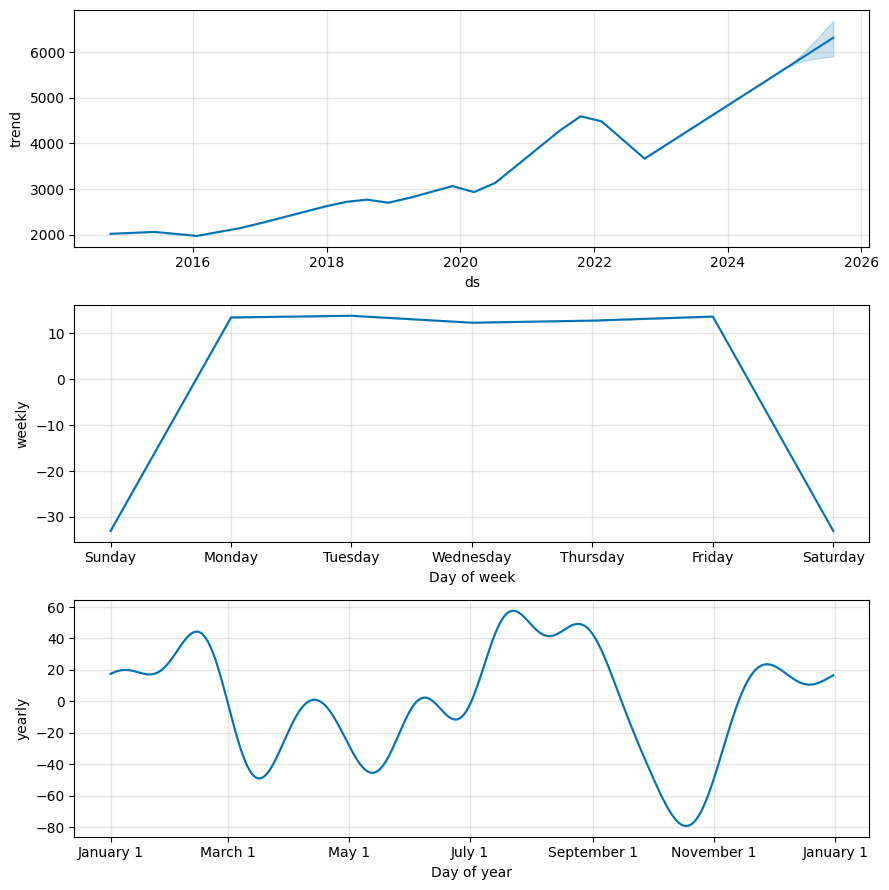

In [ ]:
model.plot_components(forecast)
plt.show()

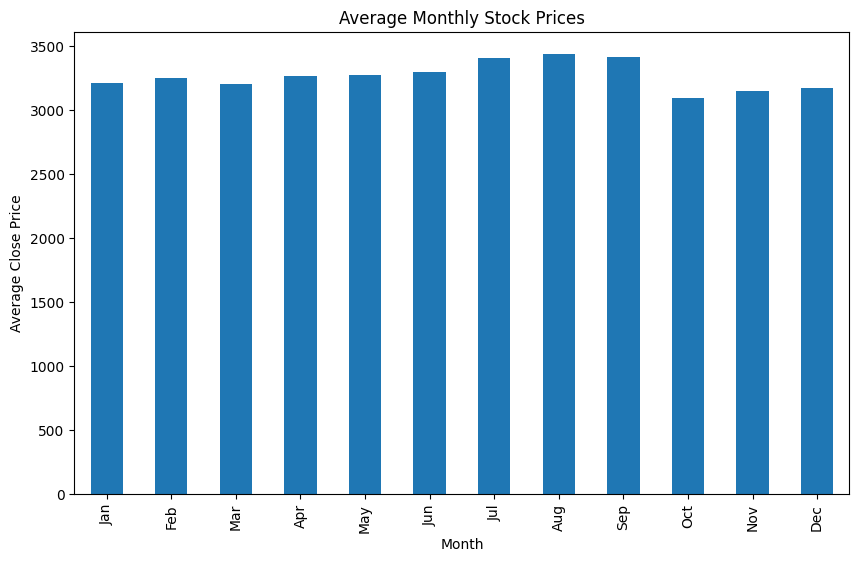

In [ ]:
# Add a 'month' column to group by months
df['month'] = df['ds'].dt.month

# Calculate average monthly stock prices
monthly_avg = df.groupby('month')['y'].mean()

# Plot the monthly averages
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Stock Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
